In [35]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from datetime import date
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn as sk
import six
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [2]:
data = pd.read_csv('data_set_cleaned.csv')
data = data.drop('Unnamed: 0', axis=1)

In [3]:
variables = data.drop(['course_id', 'userid_DI', 'grade', 'Unknown/Other', 'UnknownLoE','u', 'o', 'm', 'YoB' ], axis=1)

In [4]:
correlations = variables.corr()

In [5]:
w, v = np.linalg.eig(correlations)

In [6]:
df = pd.DataFrame(columns= ['variables', 'w'])

In [7]:
df['variables'] = correlations.columns
df['w'] = w

In [8]:
df

,variables,w
0,viewed,3.918071
1,explored,1.930139
2,nevents,0.039928
3,ndays_act,0.124346
4,nplay_video,0.164388
5,nchapters,0.154892
6,nforum_posts,1.604177
7,Australia,0.322393
8,Bangladesh,0.444625
9,Brazil,1.394412


In [97]:
colums = ['viewed', 'explored', 'nevents', 'ndays_act',
       'nplay_video', 'nchapters', 'nforum_posts', 'days_active',
       'age']

In [98]:
n_c = data[colums].corr()

In [99]:
w, v = np.linalg.eig(n_c)

In [100]:
df1 = pd.DataFrame(columns= ['variables', 'w'])

In [101]:
df1['variables'] = n_c.columns
df1['w'] = w

In [102]:
df1

,variables,w
0,viewed,3.888165
1,explored,1.088961
2,nevents,1.016830
3,ndays_act,0.953093
4,nplay_video,0.768979
5,nchapters,0.669203
6,nforum_posts,0.164721
7,days_active,0.127928
8,age,0.322121


In [ ]:
variables.columns

In [9]:
excluded = ['course_id', 'o', 'u','userid_DI', 'final_cc_cname_DI', 'start_time_DI', 'last_event_DI', 'LoE_DI','YoB', 'gender','grade'] 

In [10]:
regression_data = data.drop(excluded, axis=1)

In [119]:
X, y = data.drop(excluded_columns, axis=1), data['grade']

In [121]:
lm = LinearRegression()
lm.fit(X, y)
predictions = lm.predict(X)
# slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
# predictions = lm.predict(X_test)
# print('MSE:', metrics.mean_squared_error(y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('R2:', metrics.r2_score(y, predictions))

R2: 0.664331573863


In [122]:
list(zip(lm.coef_, X.columns))

[(-0.021455092134146654, 'viewed'),
 (0.12989264399133113, 'explored'),
 (4.1985044848205037e-05, 'nevents'),
 (0.0034399036901218661, 'ndays_act'),
 (-7.8216482870242798e-05, 'nplay_video'),
 (0.0088992639366891561, 'nchapters'),
 (-0.0067114154689797969, 'nforum_posts'),
 (0.0042974887997728473, 'Australia'),
 (-0.0037371560869932929, 'Bangladesh'),
 (-0.001437617768011054, 'Brazil'),
 (-0.00075925328683452108, 'Canada'),
 (0.00056141261073551995, 'China'),
 (0.0026590992023423298, 'Colombia'),
 (-0.0034099739769944048, 'Egypt'),
 (0.004270331737880384, 'France'),
 (0.0063054610072081213, 'Germany'),
 (0.00423673580104962, 'Greece'),
 (0.0042322143477574528, 'India'),
 (0.00017000426492737178, 'Indonesia'),
 (-0.0059516952853807545, 'Japan'),
 (-0.0043626619675569498, 'Mexico'),
 (-0.0020677732712166405, 'Morocco'),
 (0.0029384503876285265, 'Nigeria'),
 (0.0028176157623762592, 'Other Africa'),
 (-0.0022738384536229372, 'Other East Asia'),
 (-0.0029404946606684731, 'Other Europe'),
 (

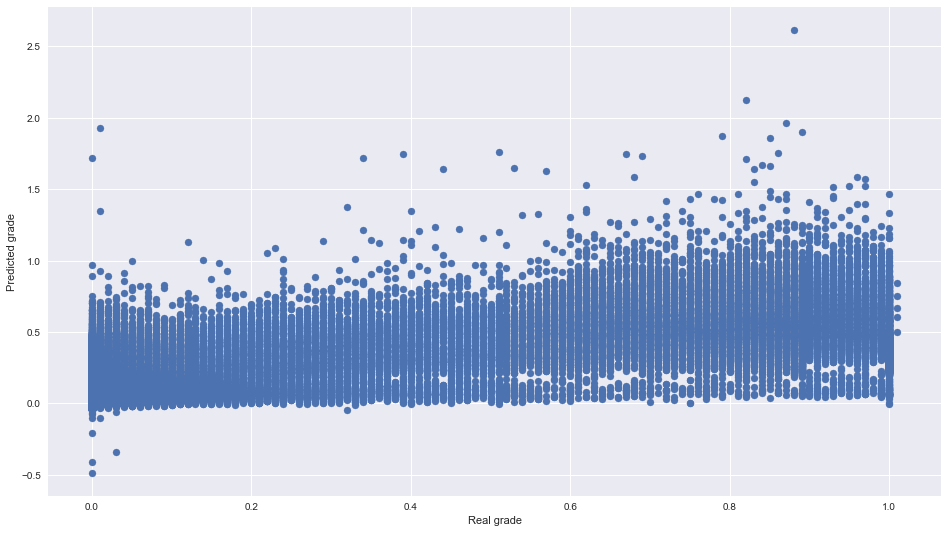

In [123]:
plt.scatter(y,predictions)
plt.xlabel('Real grade')
plt.ylabel('Predicted grade')

In [11]:
def reg_model(excluded_columns):
    X, y = regression_data.drop(excluded_columns, axis=1), data['grade']
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    return metrics.r2_score(y, predictions)

In [136]:
a = ['Unknown/Other', 'UnknownLoE', 'm', 'nevents', 'nchapters', 'explored']

In [138]:
b = ['nevents', 'nchapters', 'explored']

In [132]:
reg_model([])

0.66433157386327846

In [137]:
reg_model(a)

0.54373607322503326

In [139]:
reg_model(b)

0.54373607139547775

In [140]:
c = ['nforum_posts', 'days_active']

In [141]:
reg_model(c)

0.66398230215765541

In [21]:
potential = ['nevents', 'nchapters', 'days_active', 'ndays_act', 'explored', 'nplay_video', 'age']

In [22]:
import itertools

In [23]:
for L in range(1, len(potential)+1):
    for subset in itertools.combinations(potential, L):
        print(str(reg_model(list(subset))) + str(subset))

0.640918817231('nevents',)
0.650563799946('nchapters',)
0.664031555417('days_active',)
0.651038625501('ndays_act',)
0.648905300061('explored',)
0.659410198648('nplay_video',)
0.664094359595('age',)
0.623157983423('nevents', 'nchapters')
0.63993654287('nevents', 'days_active')
0.575903057956('nevents', 'ndays_act')
0.623088321728('nevents', 'explored')
0.64021427862('nevents', 'nplay_video')
0.64058649234('nevents', 'age')
0.650518574968('nchapters', 'days_active')
0.629718169912('nchapters', 'ndays_act')
0.586826210916('nchapters', 'explored')
0.643472024759('nchapters', 'nplay_video')
0.650390901213('nchapters', 'age')
0.65101853763('days_active', 'ndays_act')
0.648838913862('days_active', 'explored')
0.659010055021('days_active', 'nplay_video')
0.663793871673('days_active', 'age')
0.63297703268('ndays_act', 'explored')
0.64483888335('ndays_act', 'nplay_video')
0.650827959244('ndays_act', 'age')
0.64411824675('explored', 'nplay_video')
0.648659296492('explored', 'age')
0.659160377766(

In [37]:
cols = ['nchapters', 'days_active', 'nplay_video', 'age', 'm', 'UnknownLoE', 'Unknown/Other']

In [38]:
X, y = regression_data.drop(cols, axis=1), data['grade']
lm = LinearRegression()
lm.fit(X, y)
predictions = lm.predict(X)
print('R2:', metrics.r2_score(y, predictions))

R2: 0.643208031565


In [39]:
list(zip(X.columns, lm.coef_))

[('viewed', -0.0053201229264707101),
 ('explored', 0.2107163868212053),
 ('nevents', 3.1782418661568251e-05),
 ('ndays_act', 0.0043903907823265517),
 ('nforum_posts', 0.0023451515032968939),
 ('Australia', -0.0019064713005046904),
 ('Bangladesh', -0.009583361768173081),
 ('Brazil', -0.0066628232581634472),
 ('Canada', -0.0064692346964872471),
 ('China', -0.0037584853751270672),
 ('Colombia', -0.0031199105046029567),
 ('Egypt', -0.011215568617616092),
 ('France', 0.0008039783663200753),
 ('Germany', 0.0039348993795217547),
 ('Greece', 0.0045163300717540045),
 ('India', -0.00045798433341079359),
 ('Indonesia', -0.0041480329171961518),
 ('Japan', -0.0084086031164866213),
 ('Mexico', -0.010659630250461795),
 ('Morocco', -0.0072732109568543262),
 ('Nigeria', -0.0062604400347556904),
 ('Other Africa', -0.0060017456917670561),
 ('Other East Asia', -0.0048660114749966713),
 ('Other Europe', -0.0070315953460302477),
 ('Other Middle East/Central Asia', -0.0068227610450800162),
 ('Other North & C

In [34]:
lm.intercept_

-0.0031258695978068629

In [36]:
sk.feature_selection.f_regression(X,y)

(array([  1.42910243e+04,   4.55802468e+05,   4.97600346e+05,
          5.78924714e+05,   6.32284474e+03,   7.01051029e+00,
          2.92469920e+01,   4.59315834e+00,   8.41254238e-02,
          1.78342543e+01,   6.55812122e+01,   6.06763948e+01,
          5.25778870e+01,   3.04879535e+02,   2.03863286e+02,
          8.20236054e+02,   2.48426537e+00,   9.18758886e+00,
          5.19709491e-01,   7.44791258e+01,   8.25988808e+00,
          6.69071353e+00,   8.16783415e+00,   6.05204827e+02,
          3.05147218e+01,   3.12032613e+01,   5.96058558e+00,
          1.19740756e+01,   2.80663387e+01,   6.33126359e+01,
          1.47376537e+01,   5.18131273e+02,   7.46517186e+01,
          3.97762143e+02,   1.41666112e+03,   1.11301297e+02,
          8.42582031e+01,   3.04030812e+02,   3.59024777e+03,
          1.55988088e+02,   5.92512337e+01,   3.65799551e+00,
          9.02287669e+02,   1.19106918e+02,   2.46799377e+02,
          2.91292857e+02,   2.91292857e+02]),
 array([  0.00000000e+00

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['ndays_act'],data['grade'])